In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("data.csv")


In [7]:
#1.	Line Plot of COVID-19 Trends
#Select a country (e.g., India or Nepal) and create a line chart showing daily cases and deaths over time.

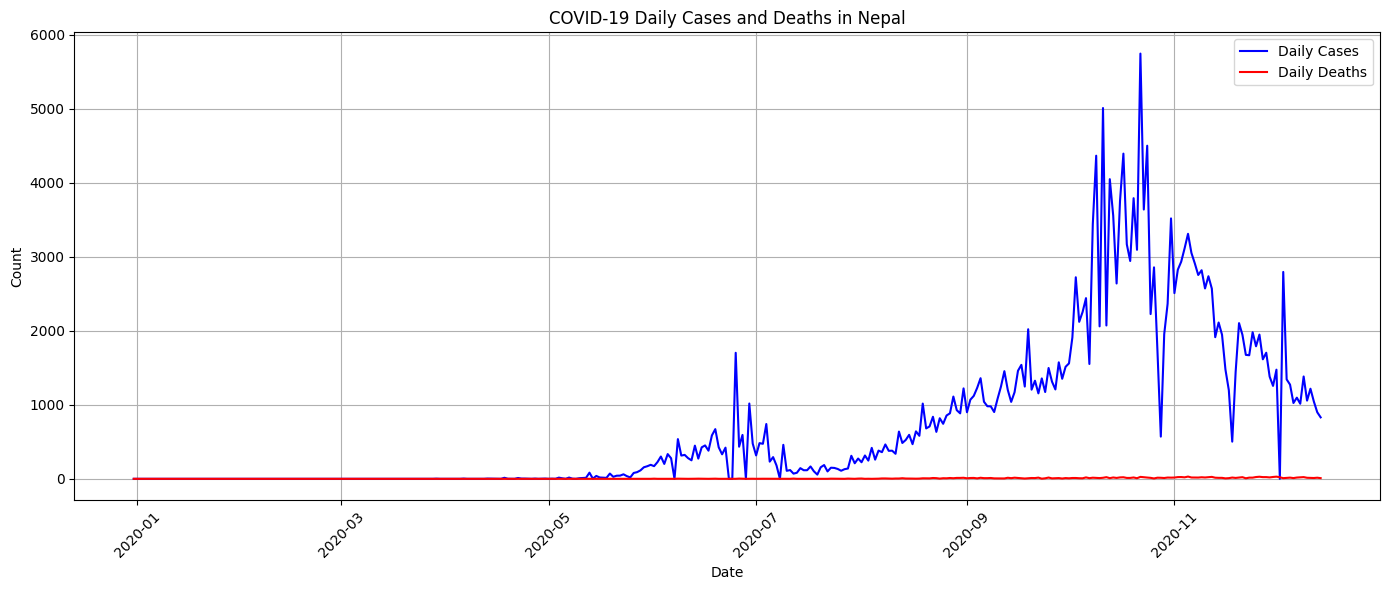

In [4]:
# Filter for Nepal
nepal_df = df[df['countriesAndTerritories'] == 'Nepal']

# Sort by date (important for line plot)
nepal_df = nepal_df.sort_values('dateRep')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=nepal_df, x='dateRep', y='cases', label='Daily Cases', color='blue')
sns.lineplot(data=nepal_df, x='dateRep', y='deaths', label='Daily Deaths', color='red')

# Customize the plot
plt.title('COVID-19 Daily Cases and Deaths in Nepal')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#2.	Top 10 Countries with Most Cases (Bar Plot)
#Group the data by countriesAndTerritories and plot a bar chart of the top 10 countries with the highest total cases.

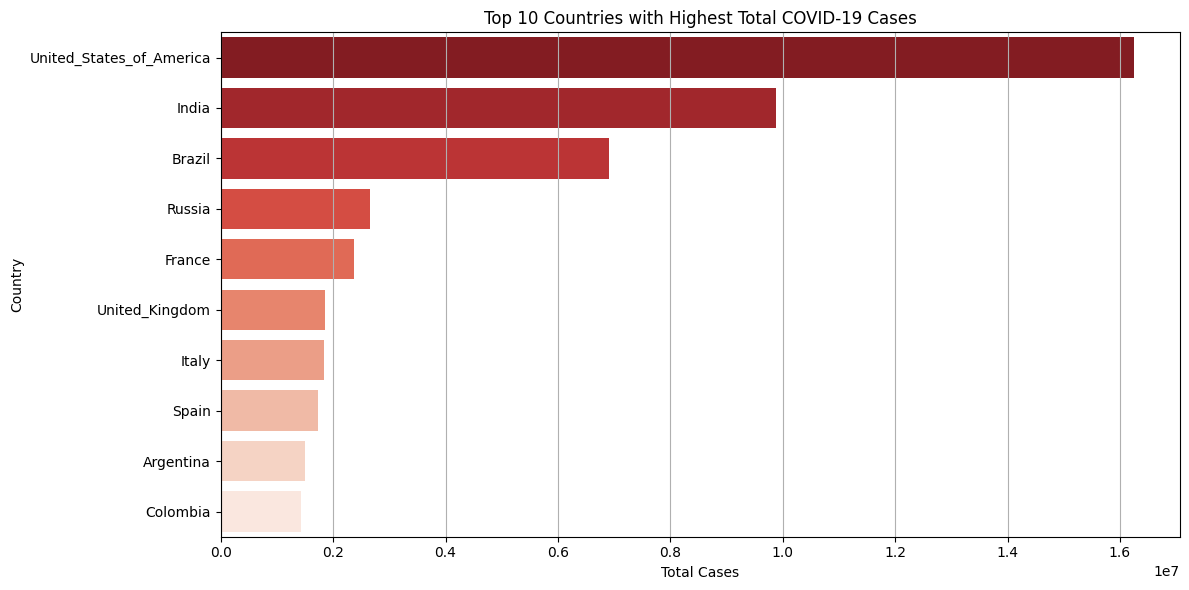

In [6]:
# Group by country and sum the total cases
country_cases = df.groupby('countriesAndTerritories')['cases'].sum().reset_index()

# Sort in descending order and get top 10
top_10 = country_cases.sort_values(by='cases', ascending=False).head(10)

# Plotting with hue to avoid FutureWarning
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10,
    x='cases',
    y='countriesAndTerritories',
    hue='countriesAndTerritories',
    palette='Reds_r',
    dodge=False,
    legend=False  # No need to repeat country names in a legend
)

# Beautify the plot
plt.title('Top 10 Countries with Highest Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#3.	Compare Continents (Box Plot)
#Create a box plot comparing the distribution of daily cases between continents (use continentExp).

C:\Users\Kiran\AppData\Local\Temp\ipykernel_11200\604337175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='continentExp', y='cases', palette='Set3')


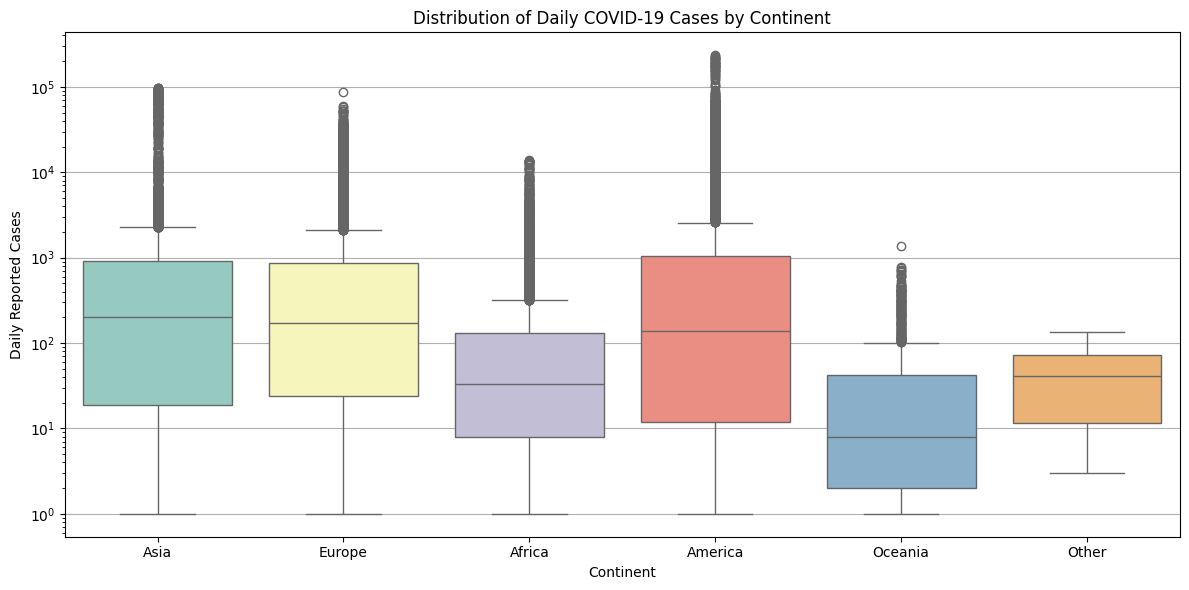

In [ ]:
# Optional: Filter out zero or negative cases (if any)
df = df[df['cases'] > 0]

# Plot: Box plot of daily cases per continent
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='continentExp', y='cases', palette='Set3')

# Customize the plot
plt.title('Distribution of Daily COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Daily Reported Cases')
plt.yscale('log') 
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#4.	Population vs Cases (Scatter Plot)
#Plot a scatter plot of total cases vs population (popData2019) for all countries. Use color (hue) for different continents.

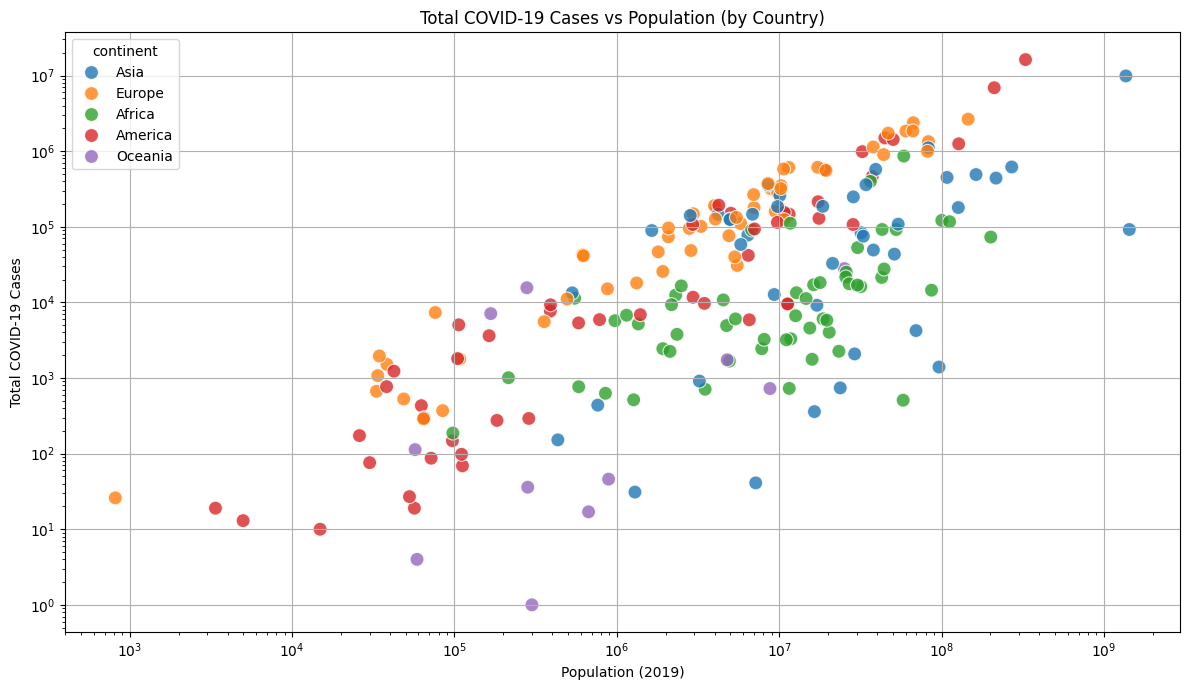

In [9]:
# Step 1: Group by country to get total cases and population (population is constant)
grouped = df.groupby(['countriesAndTerritories', 'continentExp', 'popData2019'])['cases'].sum().reset_index()

# Step 2: Rename for clarity (optional)
grouped.rename(columns={
    'cases': 'total_cases',
    'popData2019': 'population',
    'continentExp': 'continent'
}, inplace=True)

# Step 3: Scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=grouped,
    x='population',
    y='total_cases',
    hue='continent',
    palette='tab10',
    alpha=0.8,
    s=100  # size of dots
)

# Step 4: Customize plot
plt.title('Total COVID-19 Cases vs Population (by Country)')
plt.xlabel('Population (2019)')
plt.ylabel('Total COVID-19 Cases')
plt.xscale('log')  # Use log scale for better spread visibility
plt.yscale('log')  # Also log scale for total cases
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [10]:
#5.	Heatmap of Correlation Matrix
#Calculate correlations between numeric columns like cases, deaths, popData2019, and Cumulative_14_day_cases_per_100k.
#Plot a heatmap with annotations.

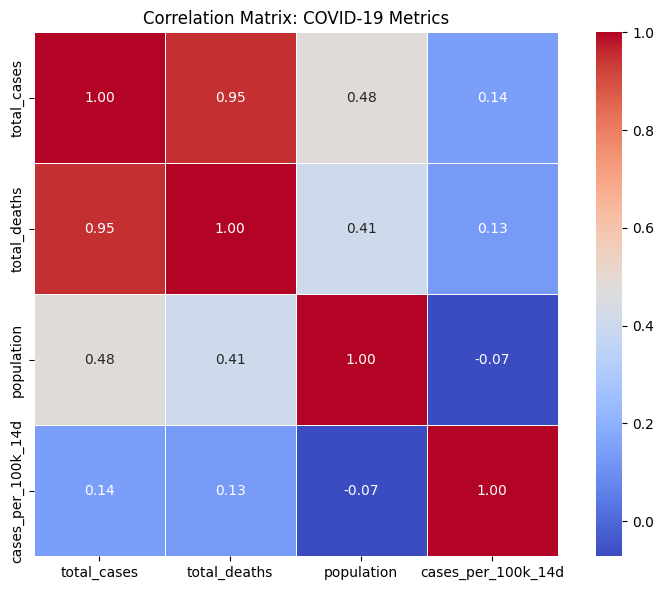

In [11]:
# Group by country to get total cases and deaths
grouped = df.groupby(['countriesAndTerritories', 'popData2019'])[
    ['cases', 'deaths']
].sum().reset_index()

# Get the latest cumulative 14-day case rate per 100k for each country
latest_14_day = df.sort_values('dateRep').groupby('countriesAndTerritories')[
    'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
].last().reset_index()

# Merge both
merged = pd.merge(grouped, latest_14_day, on='countriesAndTerritories')

# Rename for clarity
merged.rename(columns={
    'cases': 'total_cases',
    'deaths': 'total_deaths',
    'popData2019': 'population',
    'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'cases_per_100k_14d'
}, inplace=True)

# Select only numeric columns
numeric_df = merged[['total_cases', 'total_deaths', 'population', 'cases_per_100k_14d']]

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Matrix: COVID-19 Metrics')
plt.tight_layout()
plt.show()


In [12]:
#6.	Custom Color Palette Plot
#Create a bar plot of average daily deaths by continent, applying a custom color palette (sns.color_palette or hex values).

C:\Users\Kiran\AppData\Local\Temp\ipykernel_11200\1565888289.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


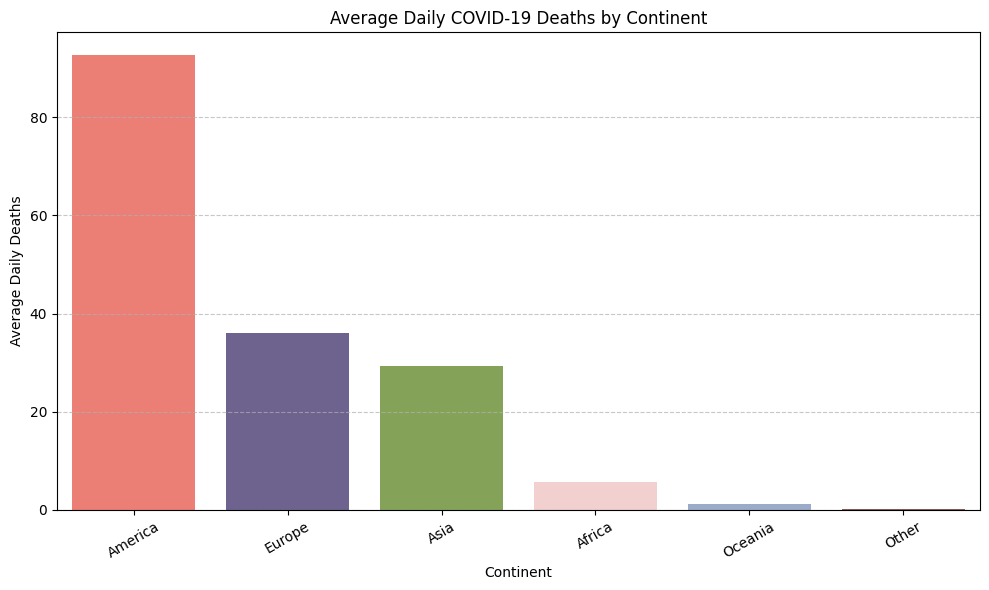

In [13]:
# Group by continent to calculate average daily deaths
continent_avg_deaths = df.groupby('continentExp')['deaths'].mean().reset_index()

# Sort for better visualization (optional)
continent_avg_deaths = continent_avg_deaths.sort_values(by='deaths', ascending=False)

# Define a custom color palette (hex codes or named colors)
custom_palette = sns.color_palette(["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=continent_avg_deaths,
    x='continentExp',
    y='deaths',
    palette=custom_palette
)

# Customize
plt.title('Average Daily COVID-19 Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Daily Deaths')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show
plt.show()


In [14]:
#7.	T-test using SciPy
#Use scipy.stats.ttest_ind() to determine if the 14-day cumulative case rate per 100k differs significantly between Asia and Europe.

In [15]:
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv('data.csv')

# Keep only the latest cumulative value per country
df_sorted = df.sort_values('dateRep')
latest_14_day = df_sorted.groupby(['countriesAndTerritories', 'continentExp'])[
    'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
].last().reset_index()

# Drop missing values
latest_14_day = latest_14_day.dropna(subset=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

# Filter by continent
asia = latest_14_day[latest_14_day['continentExp'] == 'Asia'][
    'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
]
europe = latest_14_day[latest_14_day['continentExp'] == 'Europe'][
    'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
]

# Perform Welch's T-test (doesn't assume equal variances)
t_stat, p_value = ttest_ind(asia, europe, equal_var=False)

# Show results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("✅ There is a significant difference between Asia and Europe.")
else:
    print("❌ There is no significant difference between Asia and Europe.")


T-statistic: -6.212528772634687
P-value: 5.1860679566071295e-08
✅ There is a significant difference between Asia and Europe.


In [16]:
#8.	Histogram of Daily Cases
#Plot a histogram showing the distribution of daily cases globally. Use bins, and add color and grid for readability.

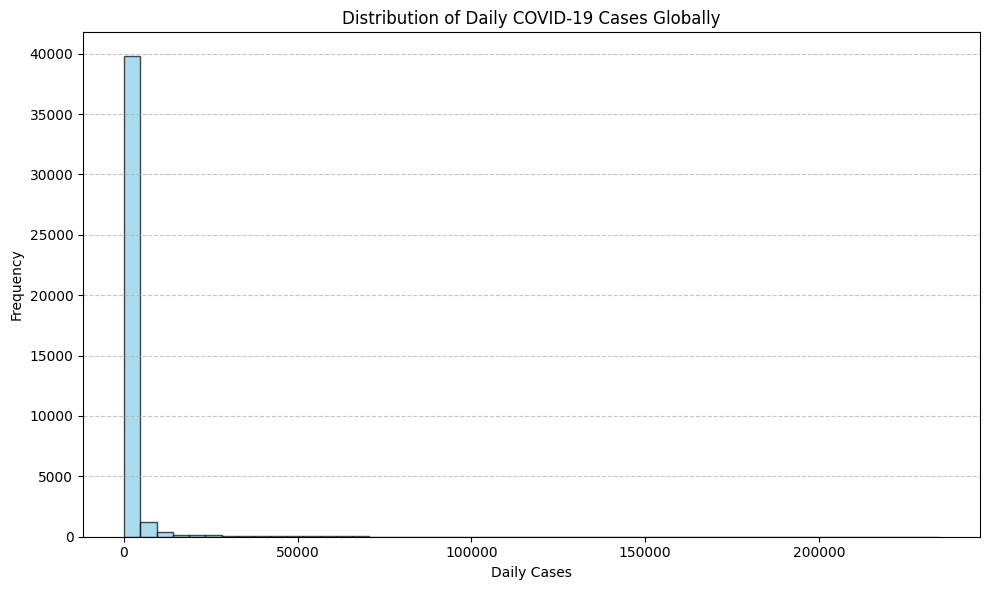

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data.csv')

# Filter out zero or negative cases to focus on actual reported cases
cases = df[df['cases'] > 0]['cases']

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(cases, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Daily COVID-19 Cases Globally')
plt.xlabel('Daily Cases')
plt.ylabel('Frequency')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [18]:
#9.	Trend of Deaths Over Months (Group by Month)
#Group the data by month and plot a line chart showing the global average number of deaths per month across all countries.

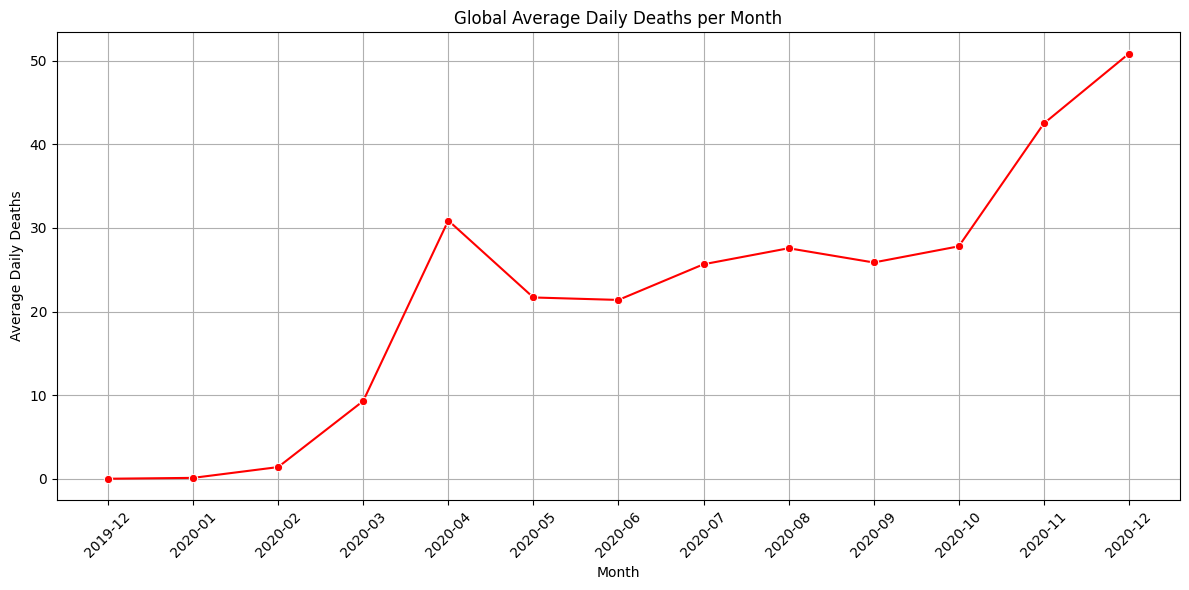

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data.csv')

# Convert 'dateRep' to datetime format
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

# Extract year-month for grouping
df['year_month'] = df['dateRep'].dt.to_period('M')

# Group by month and calculate average daily deaths globally
monthly_avg_deaths = df.groupby('year_month')['deaths'].mean().reset_index()

# Convert Period to string for plotting
monthly_avg_deaths['year_month'] = monthly_avg_deaths['year_month'].astype(str)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg_deaths, x='year_month', y='deaths', marker='o', color='red')

plt.title('Global Average Daily Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#10.Cumulative Case Rate: Top vs Bottom Countries
#Select the top 5 and bottom 5 countries based on Cumulative_14_day_cases_per_100k.
#Plot a horizontal bar chart comparing them.

C:\Users\Kiran\AppData\Local\Temp\ipykernel_11200\3100353824.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


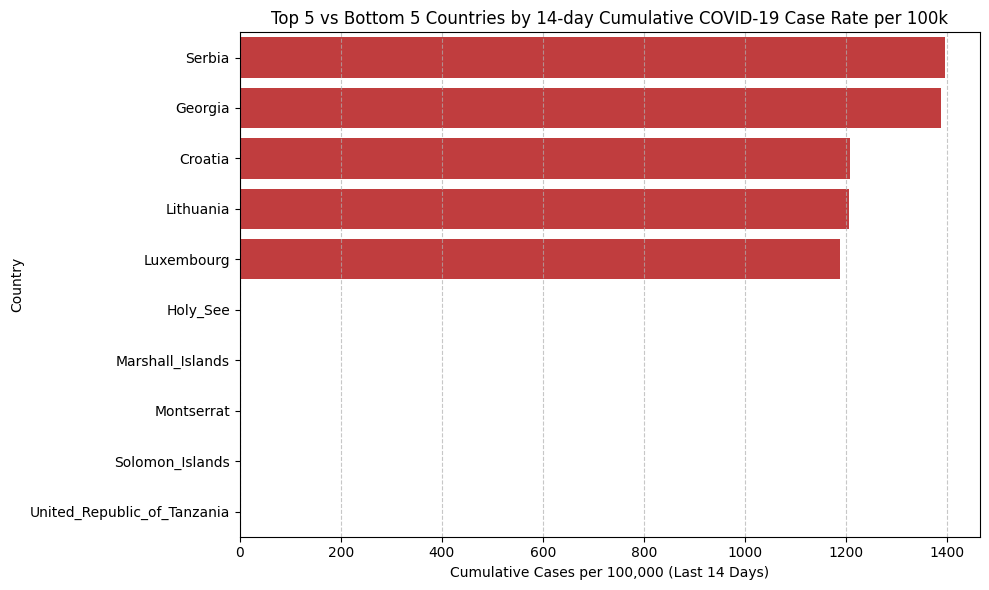

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data.csv')

# Get the latest record for each country (to get the most recent cumulative case rate)
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
latest_data = df.sort_values('dateRep').groupby('countriesAndTerritories').last().reset_index()

# Select relevant columns
latest_data = latest_data[['countriesAndTerritories', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

# Drop rows with missing values
latest_data = latest_data.dropna(subset=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

# Sort descending for top and ascending for bottom
top5 = latest_data.nlargest(5, 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')
bottom5 = latest_data.nsmallest(5, 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')

# Combine top and bottom into one dataframe
combined = pd.concat([top5, bottom5])

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined,
    x='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
    y='countriesAndTerritories',
    palette=['#d62728']*5 + ['#1f77b4']*5  # Red for top5, Blue for bottom5
)

plt.title('Top 5 vs Bottom 5 Countries by 14-day Cumulative COVID-19 Case Rate per 100k')
plt.xlabel('Cumulative Cases per 100,000 (Last 14 Days)')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
